# Water Cycle of Germany
This is project about extracting rainfall data from German datasets provided by the federal and state governments and use it find out correlations between the various phenomena being reported by the datasets

This project was first done at Creative Code Jam

## Aim

To find out the relationship between rainfall and groundwater in
Germany 

## References
+ https://www.gedo-seelow.de/component/gedo/?view=nmdata&Itemid=136
+ https://www.gedo-seelow.de/component/gedo/?view=gmdata&Itemid=10
+ http://www.luis.brandenburg.de/w/hwmz/frankfurt/oder/pegel/W7100022/
+ http://www.pegelonline.wsv.de/charts/OnlineVisualisierungGanglinie?+pegelnummer=603140&imgBreite=450&pegelparameter=HSW,GLW&dauer=300
+ https://www.gdws.wsv.bund.de/DE/startseite/startseite_node.html
+ http://www.pegelonline.wsv.de/webservices/files/SALINIT%C4T/ELBE/WEHR+GEESTHACHT+UP/20.11.2019

## Procedure

### Dependencies

In [1]:
!pip install -q df2geojson

In [2]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import df2geojson
from IPython.display import GeoJSON

### Common Utilities

In [3]:
GROUNDWATER_KEY = "gmdata.filterdata";
RAINFALL_KEY = "nmdata.filterdata";

def constructURI(type_of_data, start_date, end_date):
    """
    This function constructs the URI that gets the data
    """
    
    base_uri = "https://www.gedo-seelow.de/"
    api_endpoint = "component/gedo/"
    task = "?task=" + type_of_data
    filter_string = "&amp;filter=" + "0"
    mode = "&amp;mode=" + "days"
    filter_startdate = "&filter_startdate=" + start_date
    filter_enddate = "&filter_enddate=" + end_date

    return (base_uri + api_endpoint + task + filter_string + mode + filter_startdate + filter_enddate)

def negate_and_numerify(input) -> float:
    """ Negates and numerifies the input"""
    number = float(input)
    return -number

### Data Extraction from REST API

In [4]:
from_date = "2019-12-06";
to_date = "2019-12-07"
groundwater_uri = constructURI(GROUNDWATER_KEY, from_date, to_date)
groundwater_response = requests.get(groundwater_uri)
groundwater_json = groundwater_response.json()

rainfall_uri = constructURI(RAINFALL_KEY, from_date, to_date)
rainfall_response = requests.get(rainfall_uri)
rainfall_json = rainfall_response.json()

### Data Transformation

#### Groundwater

In [5]:
groundwater_matrix = pd.json_normalize(groundwater_json["items"])
groundwater_matrix.head()

id alias                  name        lat        lng article_id  \
0  50  GW01           Hohenwutzen  52.852741  14.112675          0   
1  51  GW02  Oderberg.Schmidtstr.  52.861286  14.046678          0   
2  52  GW03               Bralitz  52.828110  14.007777          0   
3  53  GW04  Bralitz Pflasterstr.  52.837273  13.985576          0   
4  54  GW05       Lieper Schleuse  52.836624  13.960195          0   

  aliasnumber   data.id            data.date data.value data.state  \
0          .a  11473910  2019-12-07 00:39:19      -1.53          0   
1          .a  11473911  2019-12-07 00:39:19      -1.33          0   
2          .a  11473912  2019-12-07 00:39:19     -12.89          0   
3          .a  11473913  2019-12-07 00:39:19      -1.86          0   
4          .a  11471066  2019-12-06 00:39:14      -0.18          0   

  data.measuring_point  data  
0                   50   NaN  
1                   51   NaN  
2                   52   NaN  
3                   53   NaN  
4                   54   NaN

#### Rainfall

In [6]:
rainfall_matrix = pd.json_normalize(rainfall_json["items"])
rainfall_matrix.head()

id alias             name        lat        lng article_id aliasnumber  \
0  1  NM01      Hohensaaten  52.867924  14.115210          0          .a   
1  2  NM02            Liepe  52.851662  13.986757          0          .a   
2  3  NM03            Gabow  52.812695  14.069743          0          .a   
3  4  NM04       Paulshof I  52.811134  14.155636          0          .a   
4  5  NM05  BF Güterbahnhof  52.789444  14.039364          0          .a   

   data.id            data.date data.value data.state data.measuring_point  
0  3290853  2019-12-07 00:39:19       3.10          0                    1  
1  3290854  2019-12-07 00:39:19       2.80          0                    2  
2  3290855  2019-12-07 00:39:19       1.60          0                    3  
3  3290856  2019-12-07 00:39:19       1.40          0                    4  
4  3290857  2019-12-07 00:39:19       1.60          0                    5

### Data Preload

##### Data Typation

In [7]:
schema_definition = {'id': int, 
                     'alias': str, 
                     'name': str, 
                     'lat': float, 
                     'lng': float, 
                     'article_id': int,
                     'aliasnumber': str,
                     'data.id': int,
                     'data.value': float,
                     'data.state': int,
                     'data.measuring_point': int
                    }

##### Data Cleanup

###### Groundwater

In [8]:
print(groundwater_matrix.count())
groundwater_matrix = groundwater_matrix.drop(columns=['data']).dropna()
groundwater_db = groundwater_matrix.astype(schema_definition)
groundwater_db['data.date'] = groundwater_db['data.date'].apply(pd.to_datetime)
print(groundwater_db.dtypes)
groundwater_db.count()

id                      83
alias                   83
name                    83
lat                     83
lng                     83
article_id              83
aliasnumber             83
data.id                 70
data.date               70
data.value              70
data.state              70
data.measuring_point    70
data                     0
dtype: int64
id                               int64
alias                           object
name                            object
lat                            float64
lng                            float64
article_id                       int64
aliasnumber                     object
data.id                          int64
data.date               datetime64[ns]
data.value                     float64
data.state                       int64
data.measuring_point             int64
dtype: object


id                      70
alias                   70
name                    70
lat                     70
lng                     70
article_id              70
aliasnumber             70
data.id                 70
data.date               70
data.value              70
data.state              70
data.measuring_point    70
dtype: int64

###### Rainfall

In [9]:
rainfall_db = rainfall_matrix.astype(schema_definition)
rainfall_db['data.date'] = rainfall_db['data.date'].apply(pd.to_datetime)
print(rainfall_db.dtypes)
rainfall_db.count()

id                               int64
alias                           object
name                            object
lat                            float64
lng                            float64
article_id                       int64
aliasnumber                     object
data.id                          int64
data.date               datetime64[ns]
data.value                     float64
data.state                       int64
data.measuring_point             int64
dtype: object


id                      21
alias                   21
name                    21
lat                     21
lng                     21
article_id              21
aliasnumber             21
data.id                 21
data.date               21
data.value              21
data.state              21
data.measuring_point    21
dtype: int64

### Plotting on a Map

In [10]:
geo = df2geojson.convert(rainfall_db, "lat", "lng", progress=True)
GeoJSON(geo, layer_options={'minZoom': 11})

Conversion Complete            

<IPython.display.GeoJSON object>

## Observations

### Statistical Chart Design

In [11]:
print(plt.style.available)
plt.style.use('ggplot')

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


#### Histogram: Groundwater vs City 

[Text(0.5, 0, 'meters'), Text(0, 0.5, 'stadt'), Text(0.5, 1.0, 'Grundwasser')]

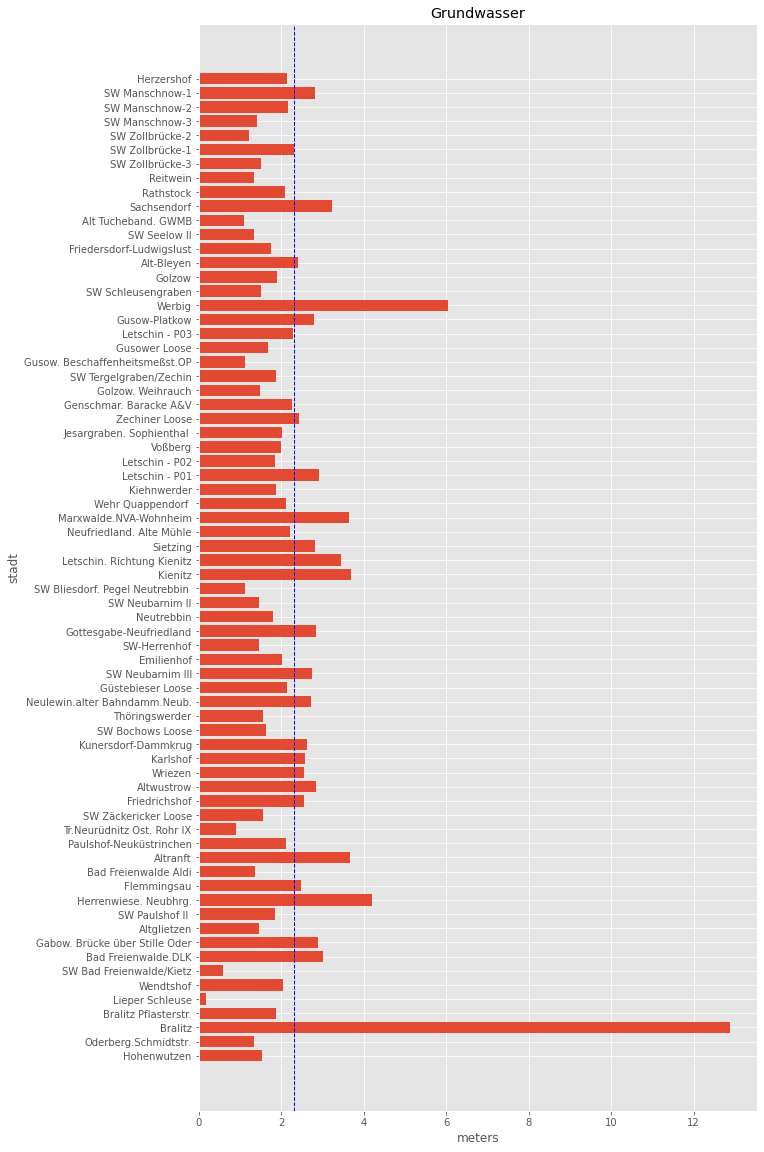

In [12]:
inversed_groundwater_values = list(map(negate_and_numerify, groundwater_db['data.value']))

groundwater_mean = np.mean(inversed_groundwater_values)

groundwater_data_figure, groundwater_axes = plt.subplots(figsize=(10,20))
groundwater_axes.barh(groundwater_db['name'], inversed_groundwater_values)
groundwater_labels = groundwater_axes.get_xticklabels()
groundwater_axes.axvline(x=groundwater_mean, color='b', label='mean', linestyle='--', linewidth=1)
groundwater_axes.set(xlabel="meters", ylabel="stadt", title="Grundwasser")

#### Histogram: Rainfall vs City 

[Text(0.5, 0, 'meters'), Text(0, 0.5, 'stadt'), Text(0.5, 1.0, 'Regnet')]

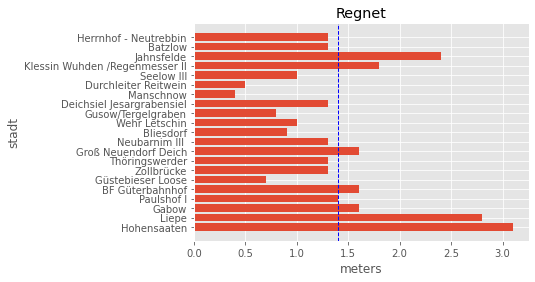

In [13]:
rainfall_mean = np.mean(rainfall_db['data.value'])

rainfall_graph, rainfall_axes = plt.subplots()
rainfall_axes.barh(rainfall_db['name'], rainfall_db['data.value'])
rainfall_axes.axvline(x=rainfall_mean, color='b', label='mean', linestyle='--', linewidth=1)
rainfall_axes.set(xlabel="meters", ylabel="stadt", title="Regnet")

## Inferences

## Conclusions